# TASK 1 - PREDICTION USING SUPRVISED ML

### AUTHOR - AISHWARYA GYANJYOTI

#### OBJECTIVE: Predicting the percentage of a student based on the no. of study hours.

#### PROBLEM STATEMENT : What will be predicted score if a student studies for 9.25 hrs/ day?

##  IMPORTING LIBRARIES

In [1]:
#Importing required libraries for linear regression

import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
sns.set_style("darkgrid")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
#Getting rid of unnecessary warnings
import warnings
warnings.simplefilter('ignore')

## READING AND UNDERSTANDING THE DATA

In [3]:
#Loading the dataset
score_card = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
score_card

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Information of the Dataset "score-card"
score_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Shape of the dataset
score_card.shape

(25, 2)

In [6]:
#Checking the null values
score_card.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#Numerical description of score_card
score_card.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# DATA VISUALIZATION

### SCORES

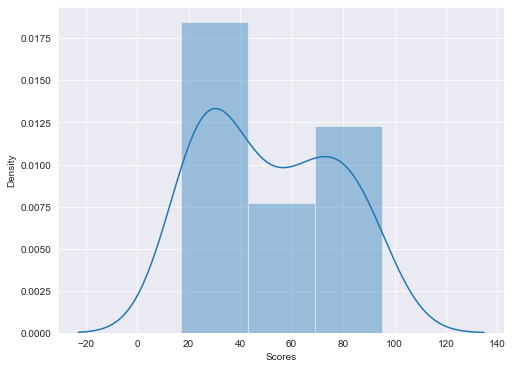

In [8]:
plt.figure(figsize=[8,6])
sns.distplot(score_card["Scores"])
plt.show()

### HOURS

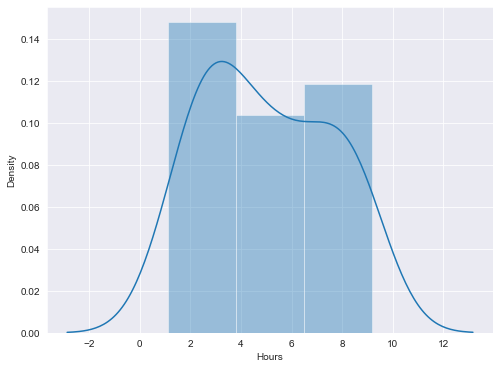

In [9]:
plt.figure(figsize=[8,6])
sns.distplot(score_card["Hours"])
plt.show()

### SCORES Vs HOURS

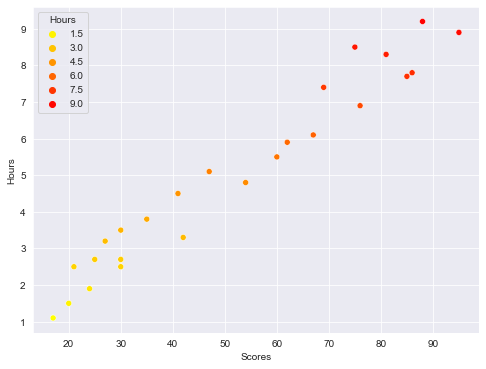

In [10]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=score_card,x="Scores",y="Hours",palette="autumn_r",hue="Hours")
plt.show()

**`INFERENCE:`** In the above plots, 
- Scores and hours aren't uniformly distributed.
- score seems to be increasing with the increase in duration of study hours.

### HEATMAP

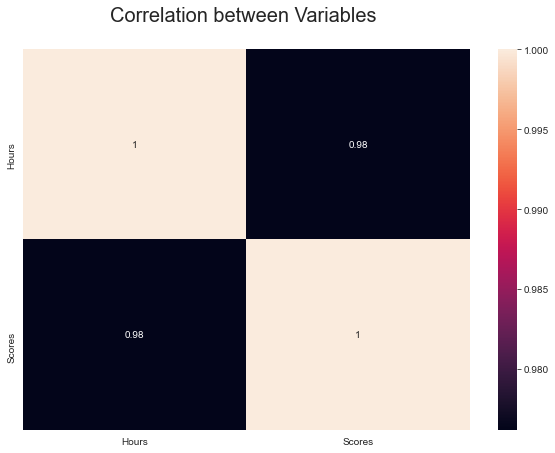

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(score_card.corr(), annot = True)
plt.title("Correlation between Variables \n",fontsize=20)
plt.show()

## DATA PREPARATION

### SPLITTING INTO TRAINING AND TEST

### Here, x is independent variable and y is the dependnet one.

In [12]:
X=score_card.drop("Scores",axis=1)
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
y = score_card.Scores
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [14]:
X.shape

(25, 1)

In [15]:
y.shape

(25,)

### Splitting of train and test taking X and y as both of them has same rows.

In [16]:
#Took train-test size as 70,30.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [17]:
X_train.shape

(17, 1)

In [18]:
X_test.shape

(8, 1)

In [19]:
y_train.shape

(17,)

In [20]:
y_test.shape

(8,)

## TRAINING THE ALGORITHM

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
coef = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
Hours,9.871714


In [23]:
print(regressor.intercept_)

1.495142109236383


## PREDICTIONS

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [25]:
db = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
db

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


### R-SQUARE AND ADJUSTED R-SQUARE

In [26]:
from sklearn.metrics import r2_score
r_square_test = r2_score(y_test,y_pred)
r_square_test

0.9309458862687437

In [27]:
adjusted_r_squared_test = 1 - (1-r_square_test)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared_test

0.92634227868666

## REGRESSION PLOT

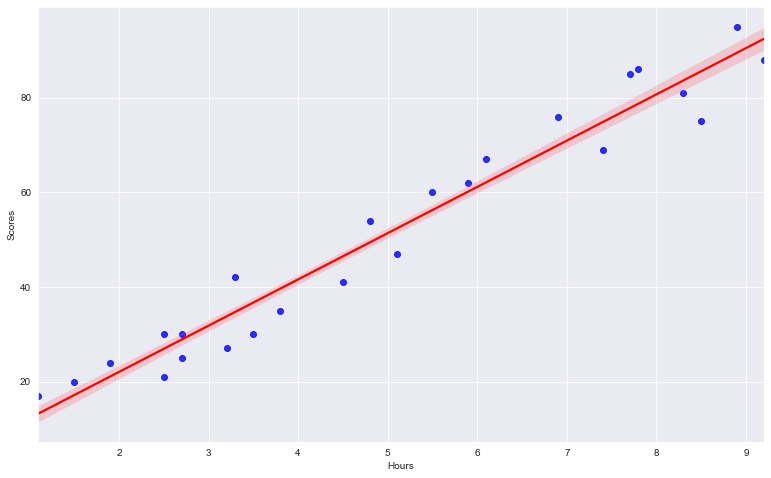

In [28]:
plt.figure(figsize=(13,8))
sns.regplot(x = X, y = y, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

## MODEL EVALUATION 

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.762517892332275
Mean Squared Error: 25.678419573283865
Root Mean Squared Error: 5.0673878451608445


## PREDICTED SCORE

In [30]:
hours = [[9.25],]
own_pred = regressor.predict(hours)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = [[9.25]]
Predicted Score = 92.80850057353504


### Therefore, the predicted score of a student studying 9.25 hours per day is 92.80.